## Objective: -

To reterive the following hidden insights from the Flipakrt data.

1.Which month of the year has maximum amount of sale ?

2.which category has maximum sale ?

3.What Women purchase on Flipkart?

4.Which Category has maximum discount by percentage ?

5.Which item has the highest price ?

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
Flipkart_data = pd.read_csv(r"X:\sir ismail AI course\jupyter data sice\dataset\flipkart_com-ecommerce_sample.csv")
Flipkart_data

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19997,93e9d343837400ce0d7980874ece471c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE7VAYDKQZEBSD,1299.0,999.0,"[""http://img5a.flixcart.com/image/sticker/b/s/...",False,Buy Elite Collection Medium Acrylic Sticker fo...,No rating available,No rating available,Elite Collection,"{""product_specification""=>[{""key""=>""Number of ..."
19998,669e79b8fa5d9ae020841c0c97d5e935,2015-12-01 10:15:43 +0000,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE8YSVEPPCZ42Y,1499.0,1199.0,"[""http://img5a.flixcart.com/image/sticker/4/2/...",False,Buy Elite Collection Medium Acrylic Sticker fo...,No rating available,No rating available,Elite Collection,"{""product_specification""=>[{""key""=>""Number of ..."
19999,cb4fa87a874f715fff567f7b7b3be79c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE88KN9ZDSGZKY,1499.0,999.0,"[""http://img6a.flixcart.com/image/sticker/z/k/...",False,Buy Elite Collection Medium Acrylic Sticker fo...,No rating available,No rating available,Elite Collection,"{""product_specification""=>[{""key""=>""Number of ..."
20000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
Flipkart_data = Flipkart_data.drop(labels=[20001,20000],axis =0,inplace=False)
Flipkart_data

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,7179d2f6c4ad50a17d014ca1d2815156,2015-12-01 10:15:43 +0000,http://www.flipkart.com/walldesign-small-vinyl...,WallDesign Small Vinyl Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE7KFJAKSTDY9G,1500.0,730.0,"[""http://img6a.flixcart.com/image/wall-decorat...",False,Buy WallDesign Small Vinyl Sticker for Rs.730 ...,No rating available,No rating available,WallDesign,"{""product_specification""=>[{""key""=>""Number of ..."
19996,71ac419198359d37b8fe5e3fffdfee09,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Stickers Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE9F5URNQGJCGH,1429.0,1143.0,"[""http://img6a.flixcart.com/image/sticker/z/g/...",False,Buy Wallmantra Large Vinyl Stickers Sticker fo...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ..."
19997,93e9d343837400ce0d7980874ece471c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE7VAYDKQZEBSD,1299.0,999.0,"[""http://img5a.flixcart.com/image/sticker/b/s/...",False,Buy Elite Collection Medium Acrylic Sticker fo...,No rating available,No rating available,Elite Collection,"{""product_specification""=>[{""key""=>""Number of ..."
19998,669e79b8fa5d9ae020841c0c97d5e935,2015-12-01 10:15:43 +0000,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,"[""Baby Care >>

In [66]:
Flipkart_data.describe()

,retail_price,discounted_price,crawl_year,Month,discounted_percentage
count,19922.000000,19922.000000,20000.000000,20000.000000,19922.000000
mean,2979.206104,1973.401767,2015.484250,7.435550,40.524285
std,9009.639341,7333.586040,0.499764,4.875165,23.548116
min,35.000000,35.000000,2015.000000,1.000000,0.000000
25%,666.000000,350.000000,2015.000000,2.000000,21.100000
50%,1040.000000,550.000000,2015.000000,12.000000,45.000000
75%,1999.000000,999.000000,2016.000000,12.000000,60.000000
max,571230.000000,571230.000000,2016.000000,12.000000,96.500000


In [67]:
Flipkart_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   uniq_id                  20000 non-null  object             
 1   crawl_timestamp          20000 non-null  datetime64[ns, UTC]
 2   product_url              20000 non-null  object             
 3   product_name             20000 non-null  object             
 4   product_category_tree    20000 non-null  object             
 5   pid                      20000 non-null  object             
 6   retail_price             19922 non-null  float64            
 7   discounted_price         19922 non-null  float64            
 8   image                    19997 non-null  object             
 9   is_FK_Advantage_product  20000 non-null  object             
 10  description              19998 non-null  object             
 11  product_rating           200

In [3]:
Flipkart_data.tail(n=5)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
19995,7179d2f6c4ad50a17d014ca1d2815156,2015-12-01 10:15:43 +0000,http://www.flipkart.com/walldesign-small-vinyl...,WallDesign Small Vinyl Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE7KFJAKSTDY9G,1500.0,730.0,"[""http://img6a.flixcart.com/image/wall-decorat...",False,Buy WallDesign Small Vinyl Sticker for Rs.730 ...,No rating available,No rating available,WallDesign,"{""product_specification""=>[{""key""=>""Number of ..."
19996,71ac419198359d37b8fe5e3fffdfee09,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Stickers Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE9F5URNQGJCGH,1429.0,1143.0,"[""http://img6a.flixcart.com/image/sticker/z/g/...",False,Buy Wallmantra Large Vinyl Stickers Sticker fo...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ..."
19997,93e9d343837400ce0d7980874ece471c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE7VAYDKQZEBSD,1299.0,999.0,"[""http://img5a.flixcart.com/image/sticker/b/s/...",False,Buy Elite Collection Medium Acrylic Sticker fo...,No rating available,No rating available,Elite Collection,"{""product_specification""=>[{""key""=>""Number of ..."
19998,669e79b8fa5d9ae020841c0c97d5e935,2015-12-01 10:15:43 +0000,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE8YSVEPPCZ42Y,1499.0,1199.0,"[""http://img5a.flixcart.com/image/sticker/4/2/...",False,Buy Elite Collection Medium Acrylic Sticker fo...,No rating available,No rating available,Elite Collection,"{""product_specification""=>[{""key""=>""Number of ..."
19999,cb4fa87a874f715fff567f7b7b3be79c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE88KN9ZDSGZKY,1499.0,999.0,"[""http://img6a.flixcart.com/image/sticker/z/k/...",False,Buy Elite Collection Medium Acrylic Sticker fo...,No rating available,No rating available,Elite Collection,"{""product_specification""=>[{""key""=>""Number of ..."


In [4]:
Flipkart_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  20000 non-null  object 
 1   crawl_timestamp          20000 non-null  object 
 2   product_url              20000 non-null  object 
 3   product_name             20000 non-null  object 
 4   product_category_tree    20000 non-null  object 
 5   pid                      20000 non-null  object 
 6   retail_price             19922 non-null  float64
 7   discounted_price         19922 non-null  float64
 8   image                    19997 non-null  object 
 9   is_FK_Advantage_product  20000 non-null  object 
 10  description              19998 non-null  object 
 11  product_rating           20000 non-null  object 
 12  overall_rating           20000 non-null  object 
 13  brand                    14136 non-null  object 
 14  product_specifications

In [5]:
## Checking the head of the data

Flipkart_data.head(n=5)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [6]:
Flipkart_data.shape

(20000, 15)

In [7]:
Flipkart_data.isnull().sum()

uniq_id                       0
crawl_timestamp               0
product_url                   0
product_name                  0
product_category_tree         0
pid                           0
retail_price                 78
discounted_price             78
image                         3
is_FK_Advantage_product       0
description                   2
product_rating                0
overall_rating                0
brand                      5864
product_specifications       14
dtype: int64

In [8]:
Flipkart_data.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications'],
      dtype='object')

<AxesSubplot:>

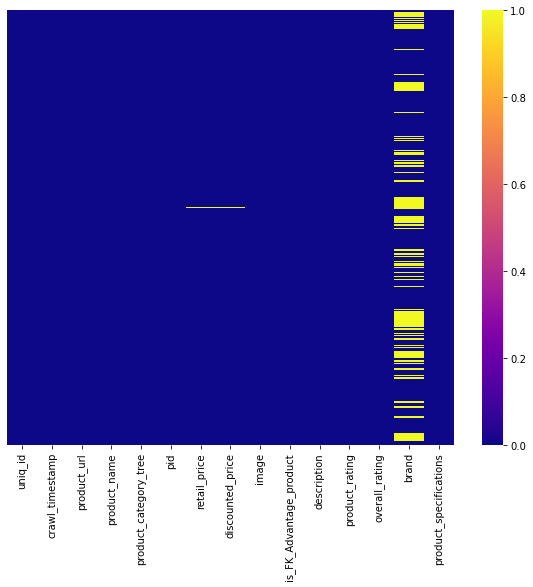

In [9]:
## The Brand column has lots of null values.

plt.figure(figsize =(10,8))
sns.heatmap(Flipkart_data.isnull(),yticklabels=False,cmap='plasma',cbar=True)

In [10]:
Flipkart_data.duplicated().value_counts()

False    20000
dtype: int64

In [11]:
#make this column into a datetime type for workability

Flipkart_data['crawl_timestamp']=pd.to_datetime(Flipkart_data['crawl_timestamp'])
Flipkart_data['crawl_timestamp']

0       2016-03-25 22:59:23+00:00
1       2016-03-25 22:59:23+00:00
2       2016-03-25 22:59:23+00:00
3       2016-03-25 22:59:23+00:00
4       2016-03-25 22:59:23+00:00
                   ...           
19995   2015-12-01 10:15:43+00:00
19996   2015-12-01 10:15:43+00:00
19997   2015-12-01 10:15:43+00:00
19998   2015-12-01 10:15:43+00:00
19999   2015-12-01 10:15:43+00:00
Name: crawl_timestamp, Length: 20000, dtype: datetime64[ns, UTC]

In [12]:
Flipkart_data['crawl_year']=Flipkart_data['crawl_timestamp'].apply(lambda x : x.year)

In [13]:
Flipkart_data['crawl_year']

0        2016
1        2016
2        2016
3        2016
4        2016
         ... 
19995    2015
19996    2015
19997    2015
19998    2015
19999    2015
Name: crawl_year, Length: 20000, dtype: int64

In [14]:
Flipkart_data['Month']=Flipkart_data['crawl_timestamp'].apply(lambda x : x.month)
Flipkart_data['Month']

0         3
1         3
2         3
3         3
4         3
         ..
19995    12
19996    12
19997    12
19998    12
19999    12
Name: Month, Length: 20000, dtype: int64

In [15]:
Flipkart_data['main_category']=Flipkart_data['product_category_tree'].apply(lambda x :x.split('>>')[0][2:len(x.split('>>')[0])-1])

In [16]:
def secondary_category(value):
    try:
        return value.split('>>')[1][1:len(value.split('>>')[1])-1]
    except IndexError:
        return 'None'       
def tertiary_category(value):
    try:
        return value.split('>>')[2][1:len(value.split('>>')[2])-1]
    except IndexError:
        return 'None'
def quaternary_category(value):
    try:
        return value.split('>>')[3][1:len(value.split('>>')[3])-1]
    except IndexError:
        return 'None'

In [17]:
Flipkart_data['secondary']=Flipkart_data['product_category_tree'].apply(secondary_category)
Flipkart_data['tertiary']=Flipkart_data['product_category_tree'].apply(tertiary_category)
Flipkart_data['quaternary']=Flipkart_data['product_category_tree'].apply(quaternary_category)

In [18]:
Flipkart_data.head(n=5)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,...,product_rating,overall_rating,brand,product_specifications,crawl_year,Month,main_category,secondary,tertiary,quaternary
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23+00:00,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",2016,3,Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23+00:00,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati...",2016,3,Furniture,Living Room Furniture,Sofa Beds & Futons,FabHomeDecor Fabric Double Sofa Bed (Finish Co...
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23+00:00,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""...",2016,3,Footwear,Women's Footwear,Ballerinas,"AW Bellies"""
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23+00:00,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",2016,3,Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23+00:00,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",...",2016,3,Pet Supplies,Grooming,Skin & Coat Care,Shampoo


Text(0, 0.5, 'Sales')

<Figure size 10800x720 with 0 Axes>

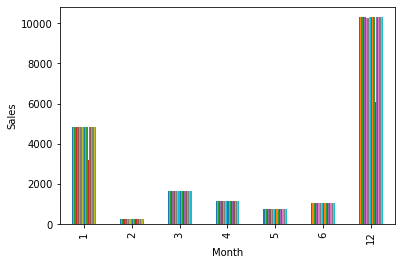

In [20]:
### Sales by month;

plt.figure(figsize=(150,10))
temp=Flipkart_data.groupby(by='Month',axis=0).count().plot(kind='bar',legend=False)
plt.ylabel('Sales')

# 12th Month of the year has most number of sales.

Text(0, 0.5, 'Sales')

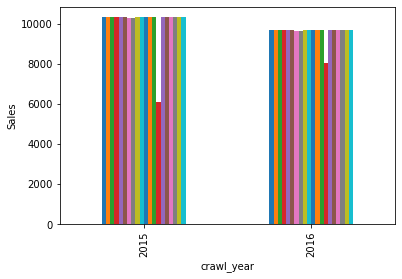

In [21]:
Flipkart_data.groupby(by='crawl_year',axis=0).count().plot(kind='bar',legend=False)
plt.ylabel('Sales')

# Both the year 2015 and 2016 has almost same amount of sale

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000., 7000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

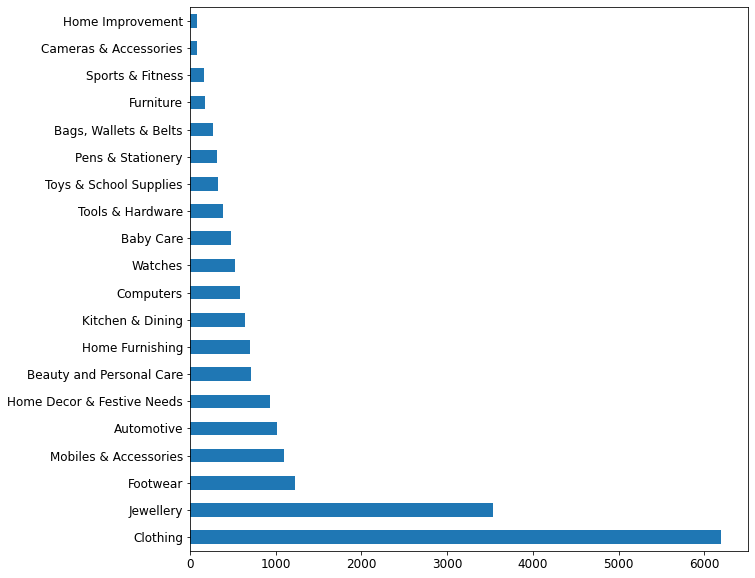

In [22]:
plt.figure(figsize=(10,10))
Flipkart_data['main_category'].value_counts()[:20].sort_values(ascending=False).plot(kind='barh')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

# Looks like Most of the customer prefer getting Cloths from Flipkart.

In [23]:
Flipkart_data['main_category'].value_counts()[:10].sort_values(ascending=False)

Clothing                      6198
Jewellery                     3531
Footwear                      1227
Mobiles & Accessories         1099
Automotive                    1012
Home Decor & Festive Needs     929
Beauty and Personal Care       710
Home Furnishing                700
Kitchen & Dining               647
Computers                      578
Name: main_category, dtype: int64

<AxesSubplot:>

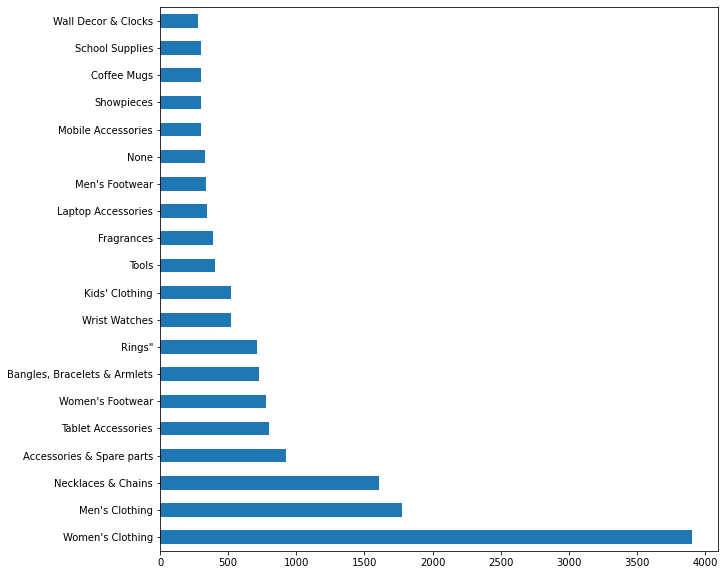

In [24]:
plt.figure(figsize=(10,10))
Flipkart_data['secondary'].value_counts()[:20].sort_values(ascending=False).plot(kind='barh')

# Ladies prefer more shopping on Flipkart compared to mens.

In [25]:
Flipkart_data['secondary'].value_counts()[:10].sort_values(ascending=False)

Women's Clothing                3901
Men's Clothing                  1773
Necklaces & Chains              1606
Accessories & Spare parts        925
Tablet Accessories               801
Women's Footwear                 781
Bangles, Bracelets & Armlets     724
Rings"                           710
Wrist Watches                    523
Kids' Clothing                   520
Name: secondary, dtype: int64

<AxesSubplot:>

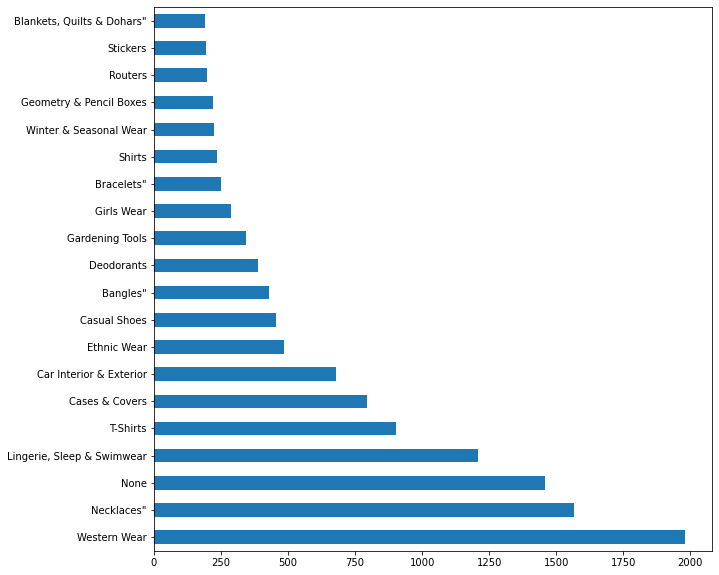

In [26]:
plt.figure(figsize=(10,10))
Flipkart_data['tertiary'].value_counts()[:20].plot(kind='barh')

# And What do ladies buy on Flipakrt, It's Western Wear :(

In [27]:
Flipkart_data['tertiary'].value_counts()[:10].sort_values(ascending=False)

Western Wear                  1981
Necklaces"                    1567
None                          1457
Lingerie, Sleep & Swimwear    1208
T-Shirts                       903
Cases & Covers                 796
Car Interior & Exterior        677
Ethnic Wear                    485
Casual Shoes                   454
Bangles"                       430
Name: tertiary, dtype: int64

<AxesSubplot:>

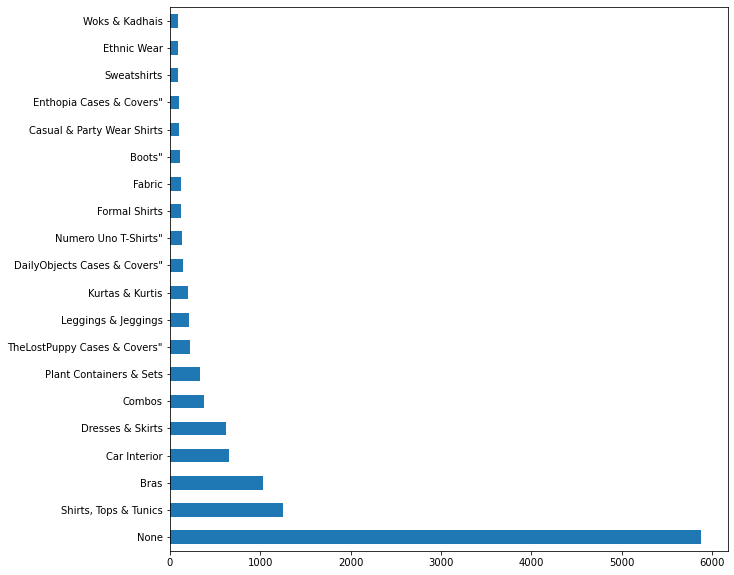

In [28]:
plt.figure(figsize=(10,10))
Flipkart_data['quaternary'].value_counts()[:20].plot(kind='barh')

In [29]:
Flipkart_data['quaternary'].value_counts()[:10].sort_values(ascending=False)

None                            5876
Shirts, Tops & Tunics           1249
Bras                            1036
Car Interior                     659
Dresses & Skirts                 620
Combos                           375
Plant Containers & Sets          333
TheLostPuppy Cases & Covers"     229
Leggings & Jeggings              209
Kurtas & Kurtis                  202
Name: quaternary, dtype: int64

In [30]:
Flipkart_data['discounted_price'].max()

571230.0

# The max Price of a product lsited in the dataset is 571230.0, it a wrist watch..

In [31]:
## Discount Percentage
#retail_price
#discounted_price
Flipkart_data['discounted_percentage']=round((Flipkart_data['retail_price']-Flipkart_data['discounted_price'])/Flipkart_data['retail_price']*100,1)

In [32]:
## that contain the product by category, average discounted percentages and count of each product.

In [33]:
main_category_discount_percentage=Flipkart_data.groupby('main_category').agg({'discounted_percentage':[np.mean],'main_category':['count']})
main_category_discount_percentage

,discounted_percentage,main_category
,mean,count
main_category,,
"883 Police Full Sleeve Solid Men's Jacket""",15.0,1
"ABEEZ Boys, Men, Girls (Black, Pack of 1)""",27.6,1
"ANAND ARCHIES Girls Flats""",10.0,2
"ANAND ARCHIES Girls Wedges""",0.0,1
"ANASAZI Casual 3/4 Sleeve Solid Women's Top""",0.0,1
...,...,...
"run of luck Solid Women's Round Neck Dark Blue T...""",0.0,1
"soie Fashion Women's Full Coverage Bra""",10.0,1


In [34]:
main_category_discount_percentage.columns=['_' .join(column) for column in main_category_discount_percentage.columns]
main_category_discount_percentage

,discounted_percentage_mean,main_category_count
main_category,,
"883 Police Full Sleeve Solid Men's Jacket""",15.0,1
"ABEEZ Boys, Men, Girls (Black, Pack of 1)""",27.6,1
"ANAND ARCHIES Girls Flats""",10.0,2
"ANAND ARCHIES Girls Wedges""",0.0,1
"ANASAZI Casual 3/4 Sleeve Solid Women's Top""",0.0,1
...,...,...
"run of luck Solid Women's Round Neck Dark Blue T...""",0.0,1
"soie Fashion Women's Full Coverage Bra""",10.0,1
"soie Fashion Women's Sports Bra""",10.0,1


In [35]:
main_category_discount_percentage[main_category_discount_percentage['main_category_count']>50].sort_values(by='main_category_count',ascending=False)

,discounted_percentage_mean,main_category_count
main_category,,
Clothing,45.071301,6198
Jewellery,40.891198,3531
Footwear,36.267184,1227
Mobiles & Accessories,51.001185,1099
Automotive,54.649901,1012
Home Decor & Festive Needs,36.647573,929
Beauty and Personal Care,19.831735,710
Home Furnishing,37.218143,700
Kitchen & Dining,43.769612,647


<AxesSubplot:ylabel='main_category'>

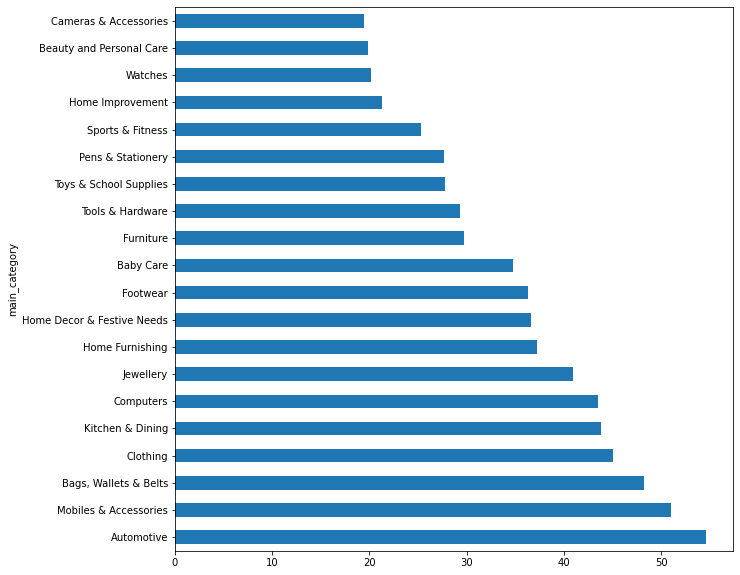

In [36]:
plt.figure(figsize=(10,10))
main_category_discount_percentage[main_category_discount_percentage['main_category_count']>50].sort_values(by='discounted_percentage_mean',ascending=False)['discounted_percentage_mean'].plot(kind='barh',legend=False)

In [37]:
## Checking for the maximum discount in the secondary category

In [38]:
secondary_discounted_percentage=Flipkart_data.groupby('secondary').agg({'discounted_percentage':[np.mean],'secondary':['count']})
secondary_discounted_percentage

,discounted_percentage,secondary
,mean,count
secondary,,
"AAO+ Aviator Sunglasses""",70.100000,3
"ABCD Small Bean Bag With Foam Filling (Black)""",60.900000,1
Academic Texts,8.333333,9
Accessories,42.653982,114
Accessories & Spare parts,55.370314,925
...,...,...
"Zyaden Oval Sunglasses""",60.100000,2
"barbarik Wayfarer, Aviator Sunglasses""",88.000000,1


In [39]:
secondary_discounted_percentage.columns=['_'.join (column) for column in secondary_discounted_percentage.columns]
secondary_discounted_percentage.columns

Index(['discounted_percentage_mean', 'secondary_count'], dtype='object')

<AxesSubplot:ylabel='secondary'>

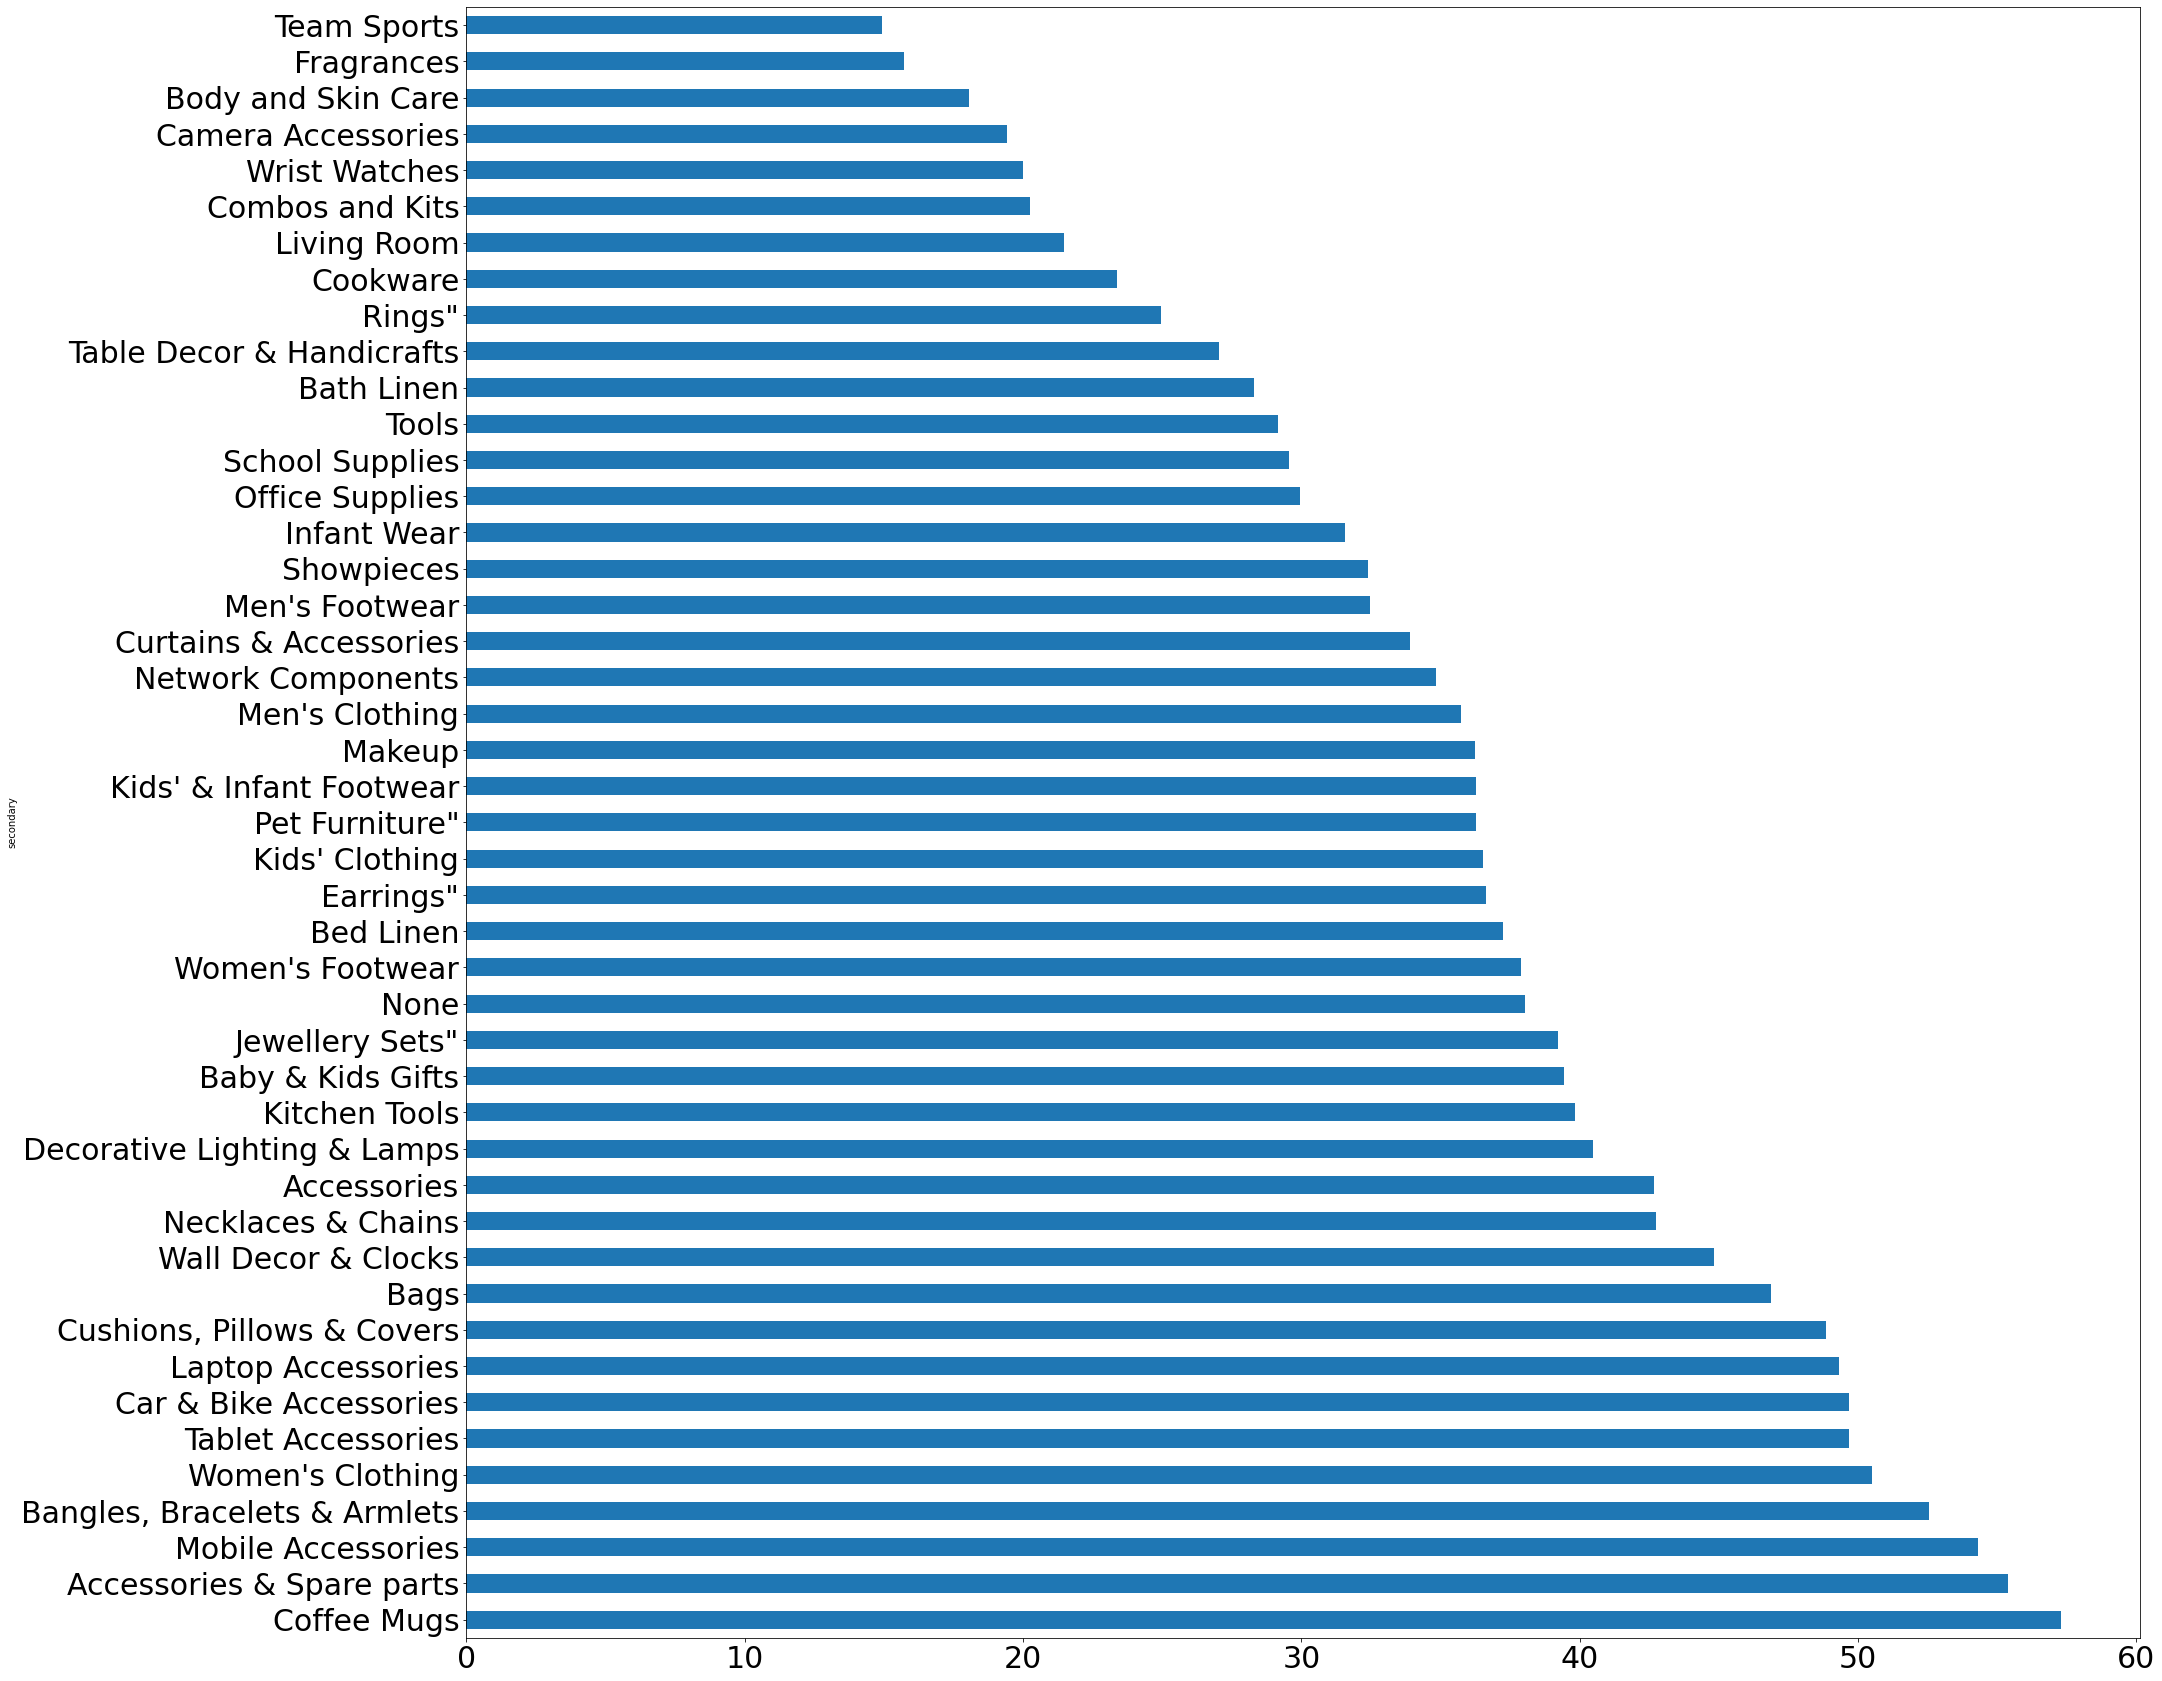

In [40]:
plt.figure(figsize=(30,30))
plt.yticks(size=30)
plt.xticks(size=30)
secondary_discounted_percentage[secondary_discounted_percentage['secondary_count']>50].sort_values(by='discounted_percentage_mean',ascending=False)['discounted_percentage_mean'].plot(kind='barh')

In [41]:
tertiary_discount_percentage=Flipkart_data.groupby('tertiary').agg({'discounted_percentage':[np.mean],'tertiary':['count']})
tertiary_discount_percentage

,discounted_percentage,tertiary
,mean,count
tertiary,,
"3wish Wrist Watches""",66.8,1
"A Avon Wrist Watches""",50.4,2
A R ENTERPRISES Musical Instruments & Toys,70.1,1
"ABCD XL Bean Bag With Foam Filling (Orange)""",70.5,1
AKUP Coffee Mugs,48.2,22
...,...,...
"piftif Women's Sports Bra""",53.8,1
posterchacha Coffee Mugs,12.5,1


In [42]:
tertiary_discount_percentage.columns=['_'.join(column) for column in tertiary_discount_percentage.columns]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58]),
 [Text(0, 0, 'Prithish Coffee Mugs"'),
  Text(0, 1, 'Car Interior & Exterior'),
  Text(0, 2, 'Bangles"'),
  Text(0, 3, 'Lingerie, Sleep & Swimwear'),
  Text(0, 4, 'Rockmantra Coffee Mugs"'),
  Text(0, 5, 'Printland Coffee Mugs"'),
  Text(0, 6, 'Hand Bags'),
  Text(0, 7, 'Ethnic Wear'),
  Text(0, 8, 'Cushion Covers"'),
  Text(0, 9, 'Cases & Covers'),
  Text(0, 10, 'Wall Decals & Stickers'),
  Text(0, 11, 'Heels"'),
  Text(0, 12, 'Backpacks'),
  Text(0, 13, 'Batteries'),
  Text(0, 14, 'Western Wear'),
  Text(0, 15, 'USB Gadgets'),
  Text(0, 16, 'Fusion Wear'),
  Text(0, 17, 'Clocks'),
  Text(0, 18, 'Series Lights'),
  Text(0, 19, 'Necklaces"'),
  Text(0, 20, 'Brooches'),
  Text(0, 21, 'Spares & Performance Parts'),
  Text(

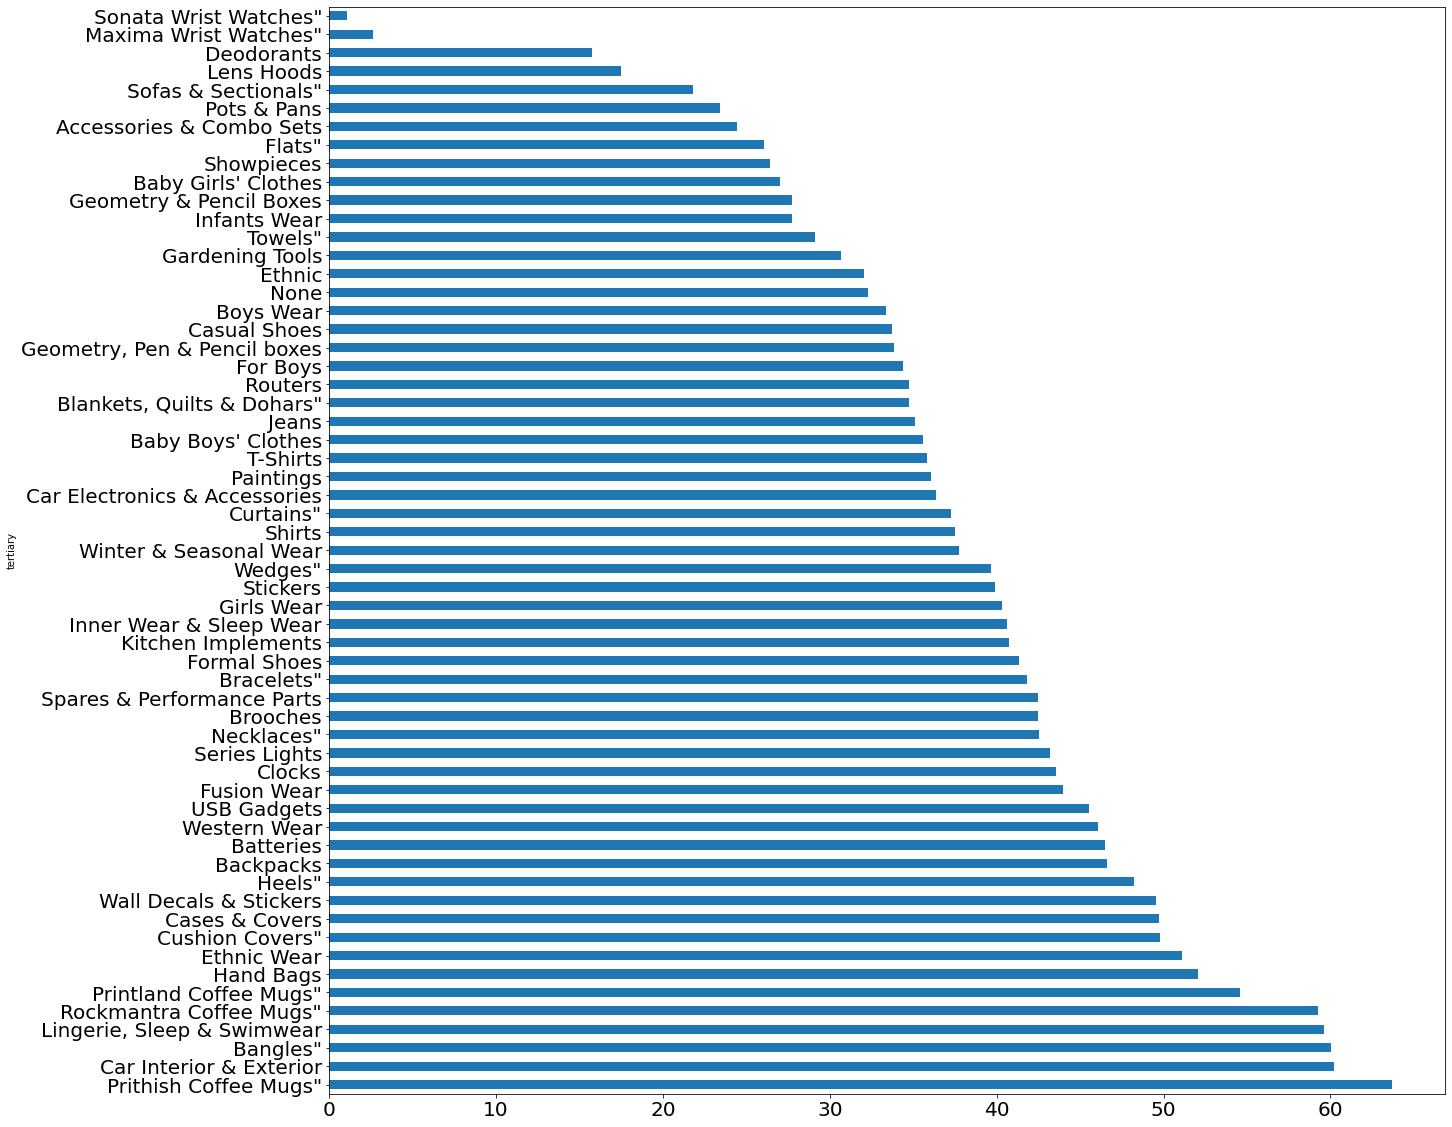

In [43]:
plt.figure(figsize=(20,20))
tertiary_discount_percentage[tertiary_discount_percentage['tertiary_count']>50].sort_values(by='discounted_percentage_mean',ascending=False)['discounted_percentage_mean'].plot(kind='barh')
plt.xticks(size=20)
plt.yticks(size=20)

''' Important Conclusion : -

1.Data consist of lots of missing values, nearly half of the year data was Missing.

2.Yes, the data needs the preperation, the date and time column has to be preprocessed.

3.Out of the available months, the 12th monthhas most number of sale.

4.Most of the sale took place in the clothing section, and secondary category is Women's clothing looks like Western wear 
  was preferred more over others.
  
5.The item that has highest price is a wrist watch.

6.Maximum avg percentage discount was provided on the Automotive section.